In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
aapl_df = pd.read_pickle('aapl_merged.pickle')

In [3]:
df = aapl_df
df = df.drop(columns= ['LastPrice', 'Symbol', 'Volume', 'OpenInterest', 'Volume'])



In [4]:
df['ExpirationDate'] =  pd.to_datetime(df['ExpirationDate'], infer_datetime_format=True)
df['DataDate'] =  pd.to_datetime(df['DataDate'], infer_datetime_format=True)
df['delta'] = df['ExpirationDate'] - df['DataDate']

df['exp?'] =df['ExpirationDate'] ==df['DataDate']
df['long_close'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['long_medium'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['long_far'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))
df['short_close'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['short_medium'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['short_far'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))

pd.set_option('display.max_columns', 30)

In [5]:
df_table=df.loc[:, ['OptionKey', 'BidPrice']]
df_table=df_table.reset_index()
df_table.columns=['PriceDate', 'OptionKey', 'RebuyPrice']
df_table['RebuyPrice'].nunique()

680

In [6]:
xp = df
xp.loc[xp['exp?']== True, 'xp' ] = xp.loc[df['exp?'] == True, 'AskPrice']
xp = xp.loc[xp['exp?']== True]
xp= xp[['OptionKey', 'xp']]
xp

,OptionKey,xp
2019-11-15,AAPL2019-11-15P185.00,0.01
2019-11-15,AAPL2019-11-15P200.00,0.01
2019-11-15,AAPL2019-11-15P205.00,0.01
2019-11-15,AAPL2019-11-15P210.00,0.01
2019-11-15,AAPL2019-11-15P215.00,0.01
...,...,...
2019-12-13,AAPL2019-12-13P277.50,3.50
2019-12-13,AAPL2019-12-13P280.00,6.85
2019-12-13,AAPL2019-12-13P282.50,9.35
2019-12-13,AAPL2019-12-13P285.00,11.85


In [7]:
df['xp']=df.OptionKey.map(xp.set_index('OptionKey')['xp'])
df

,OptionKey,ExpirationDate,AskPrice,BidPrice,PutCall,StrikePrice,UnderlyingPrice,DataDate,time delta,% out,LSTM Predicted Signal,RF Predicted Value,LSTM OTM Cr Entry,RF OTM Cr Entry,Bid Price,delta,exp?,long_close,long_medium,long_far,short_close,short_medium,short_far,xp
2019-11-13,AAPL2019-11-15P170.00,2019-11-15,0.01,0.00,put,170.0,264.47,2019-11-13,2 days,-0.357205,1,0,0.0,0.0,0.0,2 days,False,False,False,False,False,False,False,NaN
2019-11-14,AAPL2019-11-15P175.00,2019-11-15,0.01,0.00,put,175.0,262.64,2019-11-14,1 days,-0.333689,1,1,0.0,0.0,0.0,1 days,False,False,False,False,False,False,False,NaN
2019-11-13,AAPL2019-11-15P185.00,2019-11-15,0.01,0.00,put,185.0,264.47,2019-11-13,2 days,-0.300488,1,0,0.0,0.0,0.0,2 days,False,False,False,False,False,False,False,0.01
2019-11-15,AAPL2019-11-15P185.00,2019-11-15,0.01,0.00,put,185.0,265.76,2019-11-15,0 days,-0.303883,1,0,0.0,0.0,0.0,0 days,True,False,False,False,False,False,False,0.01
2019-11-14,AAPL2019-11-15P190.00,2019-11-15,0.01,0.00,put,190.0,262.64,2019-11-14,1 days,-0.276576,1,1,0.0,0.0,0.0,1 days,False,False,False,True,False,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16,AAPL2019-12-27P305.00,2019-12-27,27.15,23.05,put,305.0,279.86,2019-12-16,11 days,0.089831,1,1,2715.0,2715.0,2305.0,11 days,False,False,False,False,False,False,False,NaN
2019-11-19,AAPL2019-12-27P310.00,2019-12-27,45.80,41.80,put,310.0,266.29,2019-11-19,38 days,0.164144,1,0,4580.0,0.0,4180.0,38 days,False,False,False,False,False,False,False,NaN
2019-12-16,AAPL2019-12-27P310.00,2019-12-27,30.75,29.60,put,310.0,279.86,2019-12-16,11 days,0.107697,1,1,3075.0,3075.0,2960.0,11 days,False,False,False,False,False,False,False,NaN
2019-12-17,AAPL2019-12-27P320.00,2019-12-27,41.55,37.80,put,320.0,280.41,2019-12-17,10 days,0.141186,1,0,4155.0,0.0,3780.0,10 days,False,False,False,False,False,False,False,NaN


In [8]:
short_close_LSTM = df.loc[(df['short_close']== True) & (df['LSTM Predicted Signal'] == 1)]
short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']
short_close_LSTM_total = short_close_LSTM['log'].sum()
print(short_close_LSTM_total)

29.54


<ipython-input-8-1d9b8a5588f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']


In [9]:
short_close_RF = df.loc[(df['short_close']== True) & (df['RF Predicted Value'] == 1)]
short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']
short_close_RF_total = short_close_RF['log'].sum()
print(short_close_RF_total)

19.859999999999996


<ipython-input-9-26e370e263bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']


In [10]:
short_medium_LSTM = df.loc[(df['short_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']
short_medium_LSTM_total = short_medium_LSTM['log'].sum()
print(short_medium_LSTM_total)

3.64


<ipython-input-10-47cc65b57caf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']


In [11]:
short_medium_RF = df.loc[(df['short_medium']== True) & (df['RF Predicted Value'] == 1)]
short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']
short_medium_RF_total = short_medium_RF['log'].sum()
print(short_medium_RF_total)

1.21


<ipython-input-11-3e62de6047f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']


In [12]:
short_far_LSTM = df.loc[(df['short_far']== True) & (df['LSTM Predicted Signal'] == 1)]
short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']
short_far_LSTM_total = short_far_LSTM['log'].sum()
print(short_far_LSTM_total)

2.5


<ipython-input-12-97cde8b08bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']


In [13]:
short_far_RF = df.loc[(df['short_far']== True) & (df['RF Predicted Value'] == 1)]
short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']
short_far_RF_total = short_far_RF['log'].sum()
print(short_far_RF_total)

0.0


<ipython-input-13-18c5042b77ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']


In [14]:
long_close_LSTM = df.loc[(df['long_close']== True) & (df['LSTM Predicted Signal'] == 1)]
long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']
long_close_LSTM_total = long_close_LSTM['log'].sum()
print(long_close_LSTM_total)

96.28999999999999


<ipython-input-14-14bc539d4f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']


In [15]:
long_close_RF = df.loc[(df['long_close']== True) & (df['RF Predicted Value'] == 1)]
long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']
long_close_RF_total = long_close_RF['log'].sum()
print(long_close_RF_total)

86.65


<ipython-input-15-2c96faa3b979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']


In [16]:
long_far_RF = df.loc[(df['long_far']== True) & (df['RF Predicted Value'] == 1)]
long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']
long_far_RF_total = long_far_RF['log'].sum()
print(long_far_RF_total)

0.03


<ipython-input-16-42ba9debbf05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']


In [17]:
long_far_LSTM = df.loc[(df['long_far']== True) & (df['LSTM Predicted Signal'] == 1)]
long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']
long_far_LSTM_total = long_far_LSTM['log'].sum()
print(long_far_LSTM_total)

2.62


<ipython-input-17-ded057f9d0d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']


In [18]:
long_medium_LSTM = df.loc[(df['long_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']
long_medium_LSTM_total = long_medium_LSTM['log'].sum()
print(long_medium_LSTM_total)

9.350000000000001


<ipython-input-18-e86d80339e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']


In [19]:
long_medium_RF = df.loc[(df['long_medium']== True) & (df['RF Predicted Value'] == 1)]
long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']
long_medium_RF_total = long_medium_RF['log'].sum()
print(long_medium_RF_total)

5.99


<ipython-input-19-29d39dcc6c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']


In [20]:
df = pd.DataFrame()
df['short_close_negatives_RF'] =(short_close_RF.log[(short_close_RF.log < 0)]).count(),
df['short_close_positives_RF'] =(short_close_RF.log[(short_close_RF.log > 0)]).count(),

df['short_close_negatives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log < 0)]).count(),
df['short_close_positives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log > 0)]).count(),

df['short_medium_negatives_RF'] =(short_medium_RF.log[(short_medium_RF.log < 0)]).count(),
df['short_medium_positives_RF'] =(short_medium_RF.log[(short_medium_RF.log > 0)]).count(),

df['short_medium_negatives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log < 0)]).count(),
df['short_medium_positives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log > 0)]).count(),

df['short_far_negatives_RF'] =(short_far_RF.log[(short_far_RF.log < 0)]).count(),
df['short_far_positives_RF'] =(short_far_RF.log[(short_far_RF.log > 0)]).count(),

df['short_far_negatives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log < 0)]).count(),
df['short_far_positives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log > 0)]).count()


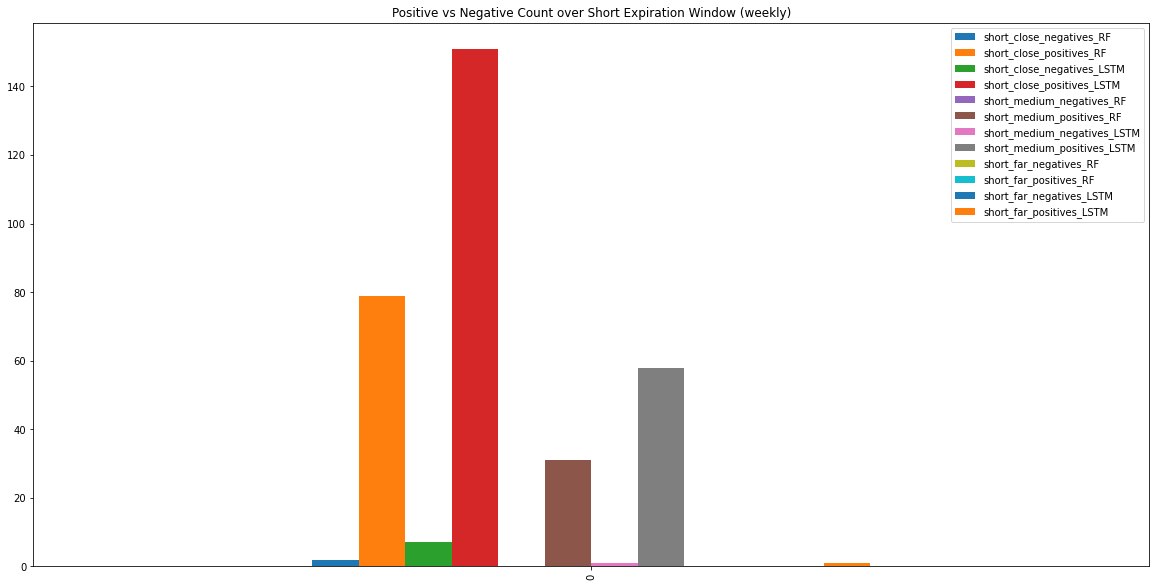

In [46]:
df = df.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (weekly)").get_figure()

In [47]:
df.savefig('aapl_neg_pos_df')

In [22]:
lf = pd.DataFrame()
lf['long_close_negatives_RF'] =(long_close_RF.log[(long_close_RF.log < 0)]).count(),
lf['long_close_positives_RF'] =(long_close_RF.log[(long_close_RF.log > 0)]).count(),

lf['long_close_negatives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log < 0)]).count(),
lf['long_close_positives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log > 0)]).count(),

lf['long_medium_negatives_RF'] =(long_medium_RF.log[(long_medium_RF.log < 0)]).count(),
lf['long_medium_positives_RF'] =(long_medium_RF.log[(long_medium_RF.log > 0)]).count(),

lf['long_medium_negatives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log < 0)]).count(),
lf['long_medium_positives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log > 0)]).count(),

lf['long_far_negatives_RF'] =(long_far_RF.log[(long_far_RF.log < 0)]).count(),
lf['long_far_positives_RF'] =(long_far_RF.log[(long_far_RF.log > 0)]).count(),

lf['long_far_negatives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log < 0)]).count(),
lf['long_far_positives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log > 0)]).count()

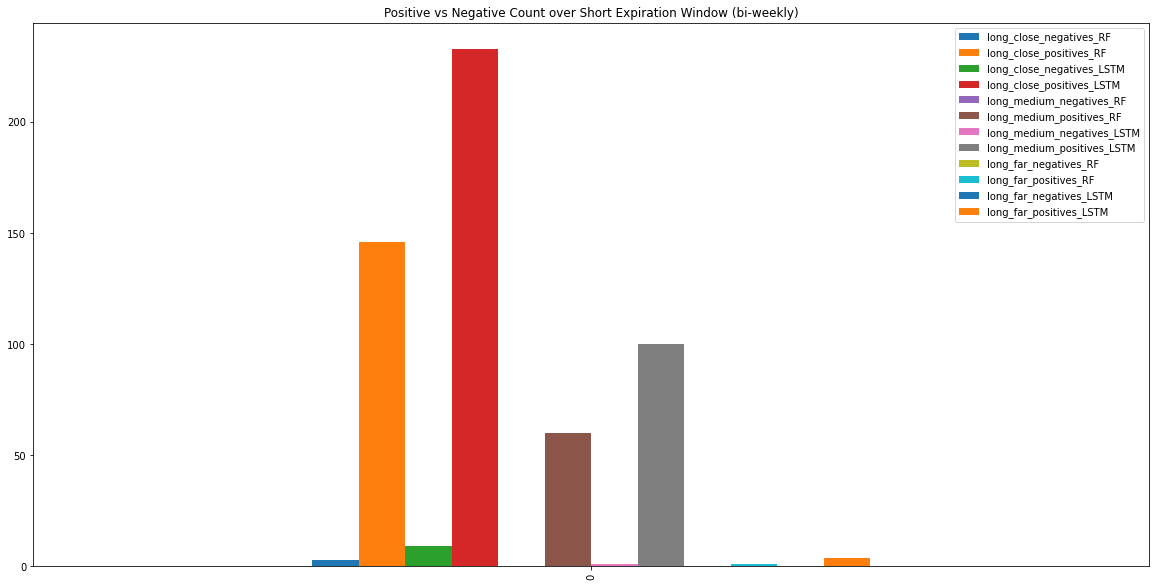

In [48]:
lf = lf.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (bi-weekly)").get_figure()

In [49]:
lf.savefig('aapl_pos_neg_lf')

In [24]:
short_equity_curve = pd.DataFrame()
short_equity_curve['short_close_RF_group'] = short_close_RF['log'].groupby(short_close_RF.index).sum()
short_equity_curve['short_close_RF_group'] = short_close_LSTM['log'].groupby(short_close_LSTM.index).sum()
short_equity_curve['short_medium_RF_group'] = short_medium_RF['log'].groupby(short_medium_RF.index).sum()
short_equity_curve['short_medium_LSTM_group'] = short_medium_LSTM['log'].groupby(short_medium_LSTM.index).sum()
short_equity_curve['short_far_RF_group'] = short_far_RF['log'].groupby(short_far_RF.index).sum()
short_equity_curve['short_far_LSTM_group'] = short_far_LSTM['log'].groupby(short_far_LSTM.index).sum()

In [25]:
short_equity_curve = short_equity_curve.cumsum()
short_equity_curve = short_equity_curve.fillna(method = 'backfill' )
short_equity_curve

,short_close_RF_group,short_medium_RF_group,short_medium_LSTM_group,short_far_RF_group,short_far_LSTM_group
2019-11-14,1.54,0.01,0.01,0.0,0.0
2019-11-18,-2.57,0.16,0.16,0.0,0.0
2019-11-21,-1.13,0.19,0.19,0.0,0.0
2019-11-22,5.26,0.54,0.54,0.0,0.0
2019-12-02,6.92,0.76,0.55,0.0,0.0
2019-12-03,6.92,1.10,0.55,0.0,0.0
2019-12-04,6.92,1.20,0.55,0.0,0.0
2019-12-05,6.92,1.21,0.55,0.0,0.0
2019-12-13,6.92,1.21,0.55,0.0,0.0
2019-12-16,6.92,1.21,0.55,0.0,0.0


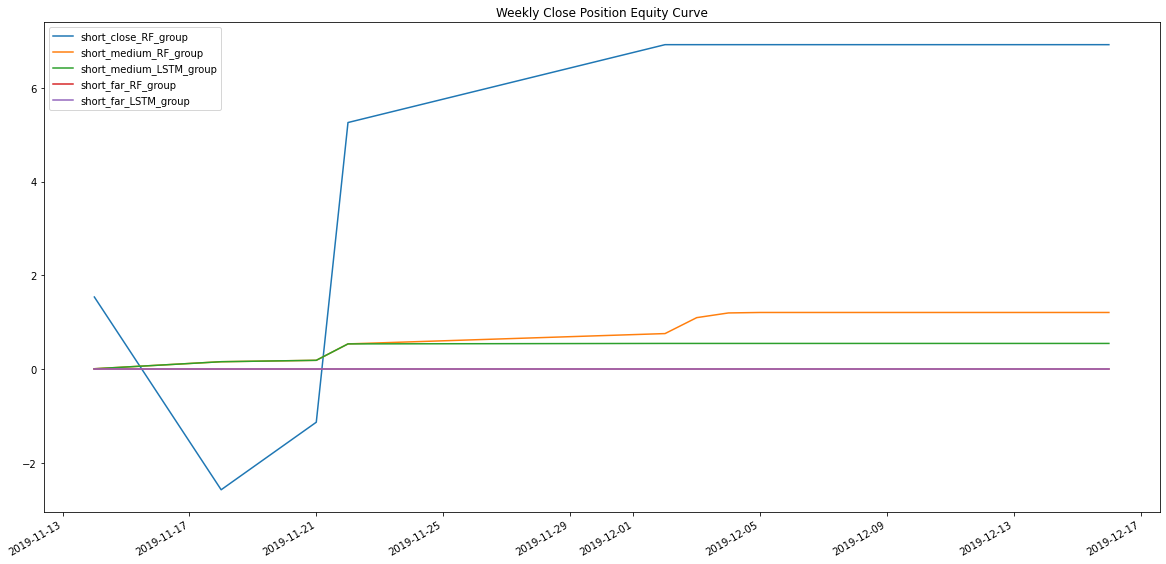

In [45]:
se = short_equity_curve.plot(kind ='line', figsize = (20,10),title ="Weekly Close Position Equity Curve").get_figure()

In [36]:
se.savefig('aapl_short_equity_curve')

In [27]:
long_equity_curve = pd.DataFrame()
long_equity_curve['long_close_RF_group'] = long_close_RF['log'].groupby(long_close_RF.index).sum()
long_equity_curve['long_close_LSTM_group'] =long_close_LSTM['log'].groupby(long_close_LSTM.index).sum()
long_equity_curve['long_medium_RF_group'] = long_medium_RF['log'].groupby(long_medium_RF.index).sum()
long_equity_curve['long_medium_LSTM_group'] = long_medium_LSTM['log'].groupby(long_medium_LSTM.index).sum()
long_equity_curve['long_far_RF_group'] = long_far_RF['log'].groupby(long_far_RF.index).sum()
long_equity_curve['long_far_LSTM_group'] = long_far_LSTM['log'].groupby(long_far_LSTM.index).sum()

In [28]:
long_equity_curve = long_equity_curve.cumsum()
long_equity_curve = long_equity_curve.fillna(method = 'backfill' )
long_equity_curve

,long_close_RF_group,long_close_LSTM_group,long_medium_RF_group,long_medium_LSTM_group,long_far_RF_group,long_far_LSTM_group
2019-11-14,7.46,7.46,0.93,0.93,0.03,0.03
2019-11-18,11.22,11.22,1.80,1.80,0.03,0.03
2019-11-21,21.46,21.46,2.32,2.32,0.03,0.03
2019-11-22,27.85,27.85,2.67,2.67,0.03,0.03
2019-12-02,44.84,39.40,3.97,3.10,0.03,0.03
2019-12-03,62.99,39.40,5.03,3.10,0.03,0.03
2019-12-04,75.10,39.40,5.56,3.10,0.03,0.03
2019-12-05,86.65,39.40,5.99,3.10,0.03,0.03
2019-12-13,86.65,39.40,5.99,3.10,0.03,0.03
2019-12-16,86.65,39.40,5.99,3.10,0.03,0.03


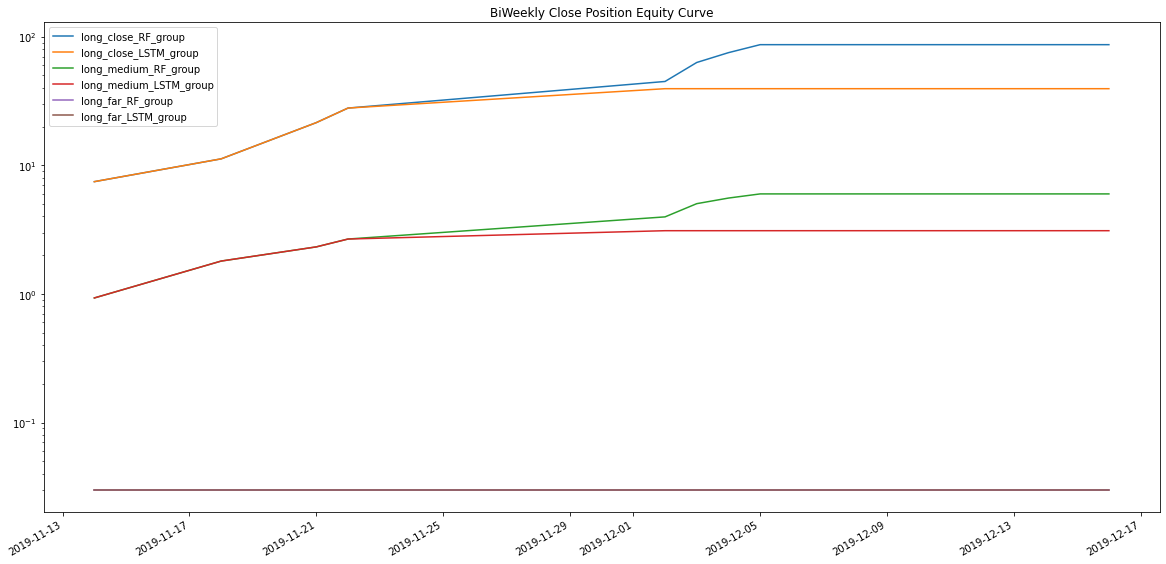

In [37]:
le =long_equity_curve.plot(logy=True, kind ='line', figsize = (20,10), title ="BiWeekly Close Position Equity Curve").get_figure()

In [38]:
le.savefig('aapl_long_equity_curve')

In [30]:
print(f'the biggest loses were', short_close_RF_total)

the biggest loses were 19.859999999999996


In [31]:
print('Selling options expiring in a week and close to the money,\n RF generated:', short_close_RF_total, '\n LSTM generated:', short_close_LSTM_total)
print('\nSelling options expiring in a week and slightly out to the money,\n RF generated:', short_medium_RF_total, '\n LSTM generated:', short_medium_LSTM_total)
print('\nSelling options expiring in a week and far out to the money,\n RF generated:', short_far_RF_total, '\n LSTM generated:', short_far_LSTM_total)


Selling options expiring in a week and close to the money,
 RF generated: 19.859999999999996 
 LSTM generated: 29.54

Selling options expiring in a week and slightly out to the money,
 RF generated: 1.21 
 LSTM generated: 3.64

Selling options expiring in a week and far out to the money,
 RF generated: 0.0 
 LSTM generated: 2.5


In [32]:
print('Selling options expiring in a two weeks and close to the money,\n RF generated:', long_close_RF_total, '\n LSTM generated:', long_close_LSTM_total)
print('\nSelling options expiring in two weeks and slightly out to the money,\n RF generated:', long_medium_RF_total, '\n LSTM generated:', long_medium_LSTM_total)
print('\nSelling options expiring in two weeks and far out to the money,\n RF generated:', long_far_RF_total, '\n LSTM generated:', long_far_LSTM_total)


Selling options expiring in a two weeks and close to the money,
 RF generated: 86.65 
 LSTM generated: 96.28999999999999

Selling options expiring in two weeks and slightly out to the money,
 RF generated: 5.99 
 LSTM generated: 9.350000000000001

Selling options expiring in two weeks and far out to the money,
 RF generated: 0.03 
 LSTM generated: 2.62


In [39]:
merged = short_equity_curve.merge(long_equity_curve, left_index = True, right_index =True)

In [44]:
#max DD calculation
maxDDLE = 0

for (columnName, columnData) in long_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDLE:
            maxDDLE = x

maxDDSE = 0

for (columnName, columnData) in short_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDSE:
            maxDDSE = x
            
print(f'Short window max DD {maxDDSE}')            
print(f'Long window max DD {maxDDLE}')

Short window max DD -2.5700000000000003
Long window max DD 0
